# SVM for classification

Load IRIS dataset, check its contents:


In [3]:
from sklearn.datasets import load_iris
iris=load_iris()
iris.feature_names
print(iris.feature_names)
print(iris.data[0:5,:])
print(iris.target[0:5])
#print(iris.data)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
[0 0 0 0 0]


Split data into training and testing parts:

In [4]:
from sklearn.model_selection import train_test_split
X=iris.data
y=iris.target
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)
print(X_train.shape)
print(X_test.shape)

(120, 4)
(30, 4)


Use a Support Vector Machine for classification:


In [5]:
from sklearn.svm import SVC
SVMmodel=SVC(kernel='linear')
SVMmodel.fit(X_train,y_train)
SVMmodel.get_params()
SVMmodel.score(X_test,y_test)

0.9666666666666667

Let's explore more now.

*   Choose only first two features (columns) of iris.data
*   SVM is in its basic form a 2-class classifier, so eliminate iris.target =2 from the data



In [6]:
# Select only the first two features for visualization
iris = load_iris()
X,y = iris.data[:,:2], iris.target
# Keep only classes 0 and 1
X,y = X[y<2], y[y<2]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

#train the SVM model
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)

#accuracy
print(svm_model.score(X_test, y_test))


1.0


Plot scatterplots of targets 0 and 1 and check the separability of the classes:

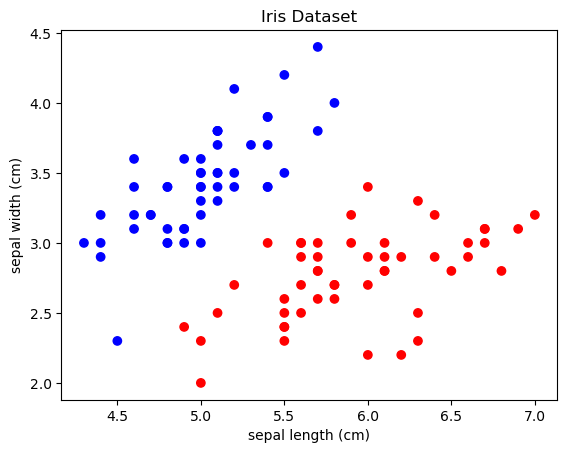

In [7]:
import matplotlib.pyplot as plt
plt.scatter(X[:,0],X[:,1],c=y,cmap='bwr')
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.title('Iris Dataset')
plt.show()

Train and test the SVM classifier, play with regularization parameter C (either use the default value or try e.g. 200)

In [8]:
# Train SVM with different regularization parameter C
svm_model_c = SVC(kernel='linear', C=200)
svm_model_c.fit(X_train, y_train)

# Test accuracy
accuracy = svm_model_c.score(X_test, y_test)
print(f"SVM Accuracy with C=200: {accuracy}")

# Store the model for later use
SVMmodel = svm_model_c

SVM Accuracy with C=200: 1.0


Show support vectors in the 2D plot, plot the decision line from equation [w0 w1]*[x0 x1] + b = 0:

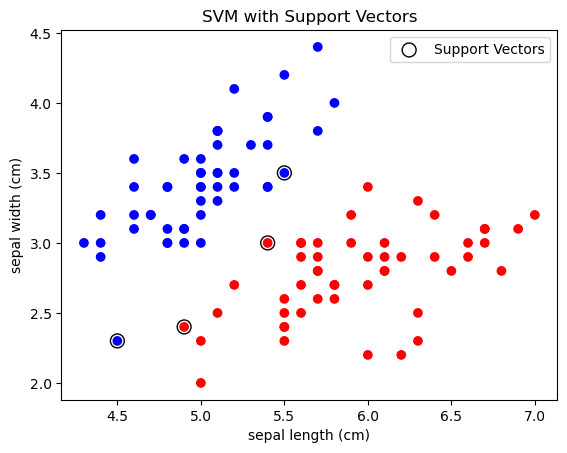

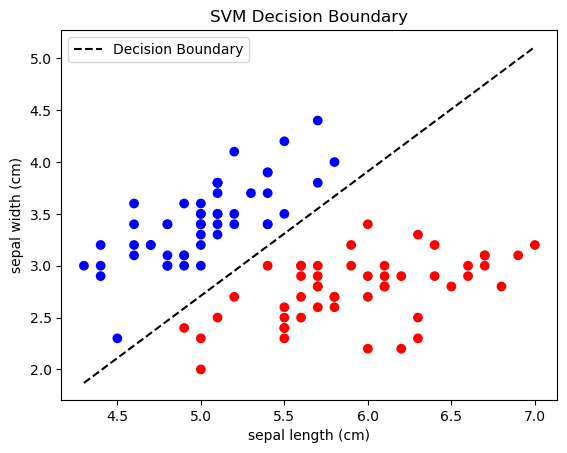

In [10]:
import numpy as np
supvectors=SVMmodel.support_vectors_
# Plot the support vectors here
plt.scatter(X[:,0],X[:,1],c=y,cmap='bwr')
plt.scatter(supvectors[:,0], supvectors[:,1], s=100, facecolors='none', edgecolors='k', label='Support Vectors')
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.title('SVM with Support Vectors')
plt.legend()
plt.show()

#Separating line coefficients:
W=SVMmodel.coef_
b=SVMmodel.intercept_
x1 = np.linspace(np.min(X[:,0]),np.max(X[:,0]),100)
x2 = -(W[0][0]*x1 + b)/W[0][1]
plt.scatter(X[:,0],X[:,1],c=y,cmap='bwr')
plt.plot(x1,x2,'k--', label='Decision Boundary')
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.title('SVM Decision Boundary')
plt.legend()
plt.show()



# Anomaly detection via SVM

Import one-class SVM and generate data (Gaussian blobs in 2D-plane):

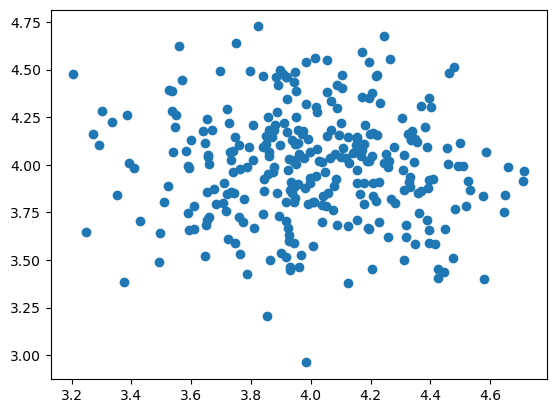

In [11]:
from sklearn.svm import OneClassSVM
from sklearn.datasets import make_blobs
from numpy import quantile, where, random

random.seed(11)
x, _ = make_blobs(n_samples=300, centers=1, cluster_std=.3, center_box=(4, 4))

plt.scatter(x[:,0], x[:,1])
plt.show()



Train one-class SVM and plot the outliers (outputs of prediction being equal to -1)

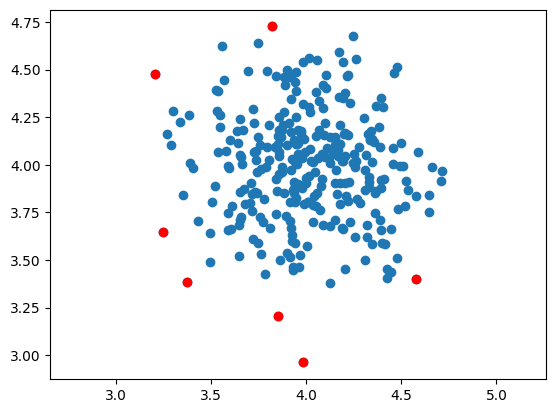

In [ ]:
SVMmodelOne = OneClassSVM(kernel='rbf', gamma=0.001, nu=0.03)


SVMmodelOne.fit(x)
pred = SVMmodelOne.predict(x)
anom_index = where(pred==-1)
values = x[anom_index]

plt.scatter(x[:,0], x[:,1])
plt.scatter(values[:,0], values[:,1], color='red')
plt.axis('equal')
plt.show()



Plot the support vectors:

What if we want to have a control what is outlier? Use e.g. 5% "quantile" to mark the outliers. Every point with lower score than threshold will be an outlier.

8.987833799021839


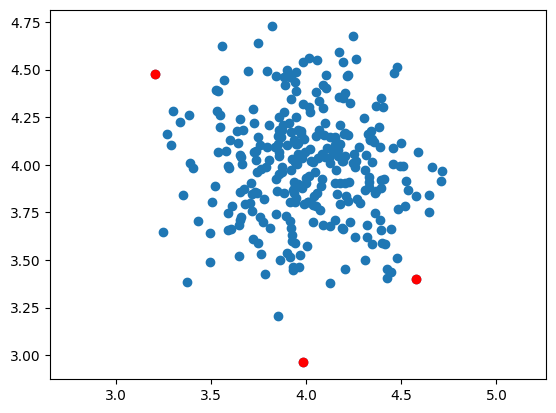

In [ ]:
scores = SVMmodelOne.score_samples(x)

thresh = quantile(scores, 0.01)
print(thresh)
index = where(scores<=thresh)
values = x[index]

plt.scatter(x[:,0], x[:,1])
plt.scatter(values[:,0], values[:,1], color='red')
plt.axis('equal')
plt.show()